In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from transformers import AutoConfig, AutoModel
from transformers.modeling_utils import load_state_dict

from magi.modelling_magi import MagiModel
from run import read_image_as_np_array as read_image

In [17]:
config = AutoConfig.from_pretrained(Path("magi").resolve(), trust_remote_code=True)
model = MagiModel(config)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [4]:
state_dict = load_state_dict("magi/pytorch_model.bin")

In [8]:
model.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['pipi'])

In [9]:
model.cuda()

MagiModel(
  (ocr_model): VisionEncoderDecoderModel(
    (encoder): ViTModel(
      (embeddings): ViTEmbeddings(
        (patch_embeddings): ViTPatchEmbeddings(
          (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        )
        (dropout): Dropout(p=0.0, inplace=False)
      )
      (encoder): ViTEncoder(
        (layer): ModuleList(
          (0-11): 12 x ViTLayer(
            (attention): ViTAttention(
              (attention): ViTSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=False)
                (key): Linear(in_features=768, out_features=768, bias=False)
                (value): Linear(in_features=768, out_features=768, bias=False)
                (dropout): Dropout(p=0.0, inplace=False)
              )
              (output): ViTSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.0, inplace=False)
              )
            )
       

In [29]:
images = [
    "./data/11.jpg",
    "./data/12.jpg",
    "./data/13.jpg",
    "./data/14.jpg",
    "./data/15.jpg",
]

images = [read_image(image) for image in images]

In [30]:
images[0].shape

(1549, 1080, 3)

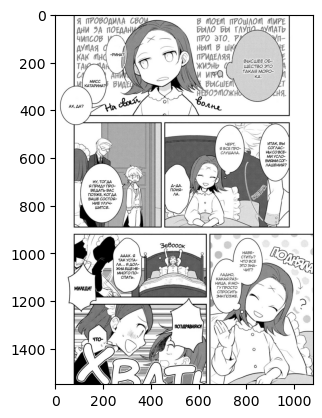

In [31]:
plt.imshow(images[0])

In [32]:
# model: MagiModel = AutoModel.from_pretrained(
#     "ragavsachdeva/magi", trust_remote_code=True
# ).cuda()

In [33]:
with torch.no_grad():
    results = model.predict_detections_and_associations(images)
    text_bboxes_for_all_images = [x["texts"] for x in results]
    ocr_results = model.predict_ocr(images, text_bboxes_for_all_images)

Generate config GenerationConfig {
  "decoder_start_token_id": 0,
  "early_stopping": true,
  "eos_token_id": 2,
  "length_penalty": 2.0,
  "max_length": 300,
  "no_repeat_ngram_size": 3,
  "num_beams": 4,
  "pad_token_id": 1
}



KeyboardInterrupt: 

In [15]:
results[0].keys()

dict_keys(['panels', 'panel_scores', 'texts', 'text_scores', 'characters', 'character_scores', 'character_character_associations', 'text_character_associations', 'character_cluster_labels', 'dialog_confidences'])

In [21]:
results[1]["character_character_associations"]

[[0, 0],
 [0, 3],
 [0, 5],
 [0, 8],
 [0, 9],
 [3, 0],
 [3, 8],
 [3, 9],
 [5, 0],
 [5, 8],
 [5, 9],
 [8, 0],
 [8, 3],
 [8, 5],
 [8, 8],
 [8, 9],
 [8, 12],
 [9, 0],
 [9, 3],
 [9, 5],
 [9, 8],
 [9, 9],
 [12, 8],
 [12, 12],
 [12, 13],
 [13, 12],
 [13, 13]]

In [8]:
for i in range(len(images)):
    model.visualise_single_image_prediction(images[i], results[i], filename=f"image_{i}.png")
    model.generate_transcript_for_single_image(
        results[i], ocr_results[i], filename=f"transcript_{i}.txt"
    )